In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [4]:
df.shape

(10002, 14)

remove the unwanted columns

In [5]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [6]:
df.columns


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

checking and removing the duplicated values in data 

In [7]:
df.duplicated().sum()

2

In [8]:
df = df.drop_duplicates()
df.duplicated().sum()

0

Dealing with the misssing values

In [9]:
df.isna().sum()

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
print(df["Geography"].mode()[0])
print(df["Age"].median())
print(df["HasCrCard"].median())
print(df["IsActiveMember"].median())

France
37.0
1.0
1.0


In [11]:
## fill the missing values using the method (Mean,median,mode)
df["Geography"] = df["Geography"].fillna(df["Geography"].mode()[0])
df["Age"]= df["Age"].fillna(df["Age"].median())
df["HasCrCard"]=df["HasCrCard"].fillna(df["HasCrCard"].median())
df["IsActiveMember"] = df["IsActiveMember"].fillna(df["IsActiveMember"].median())

In [12]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

checking info

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  float64
 8   IsActiveMember   10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 937.5+ KB


In [14]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.922903,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487128,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Obsarvation:
Insight of dataset: it is 11 columns as types columns are float64(5), int64(4), object(2)

change dtype float to int

In [15]:
df["Age"] = df["Age"].astype(int)
df["HasCrCard"] = df["HasCrCard"].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 937.5+ KB


Observation:
Insight of the exited columns : according to data actual exited customer are 2037 and percentage wise 20.4% of the customers are exited.

Exited
0    7963
1    2037
Name: count, dtype: int64


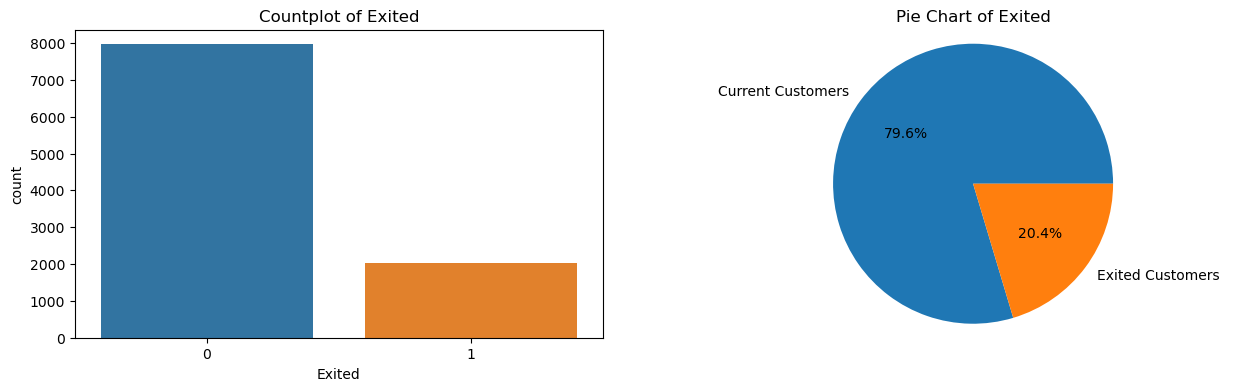

In [17]:
# find the the insight the exited columns and visualization using the countplot for seaborn and pie plot.

plt.figure(figsize=(15, 4))

# Subplot 1: Countplot
plt.subplot(1, 2, 1)
sns.countplot(x="Exited", data=df)
plt.title("Countplot of Exited")

# Subplot 2: Pie Plot
plt.subplot(1, 2, 2)
labels = ["Current Customers", "Exited Customers"]
sizes = df["Exited"].value_counts()

plt.pie(sizes, labels=labels, autopct="%.1f%%")
plt.title("Pie Chart of Exited")
plt.axis('equal')


print(df["Exited"].value_counts())
plt.show()


Exited  Geography
0       France       4204
        Spain        2064
        Germany      1695
1       Germany       814
        France        810
        Spain         413
Name: count, dtype: int64


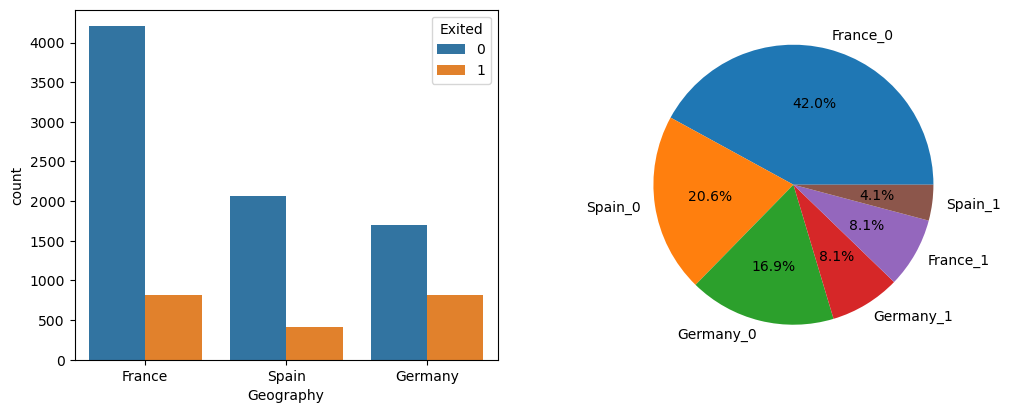

In [18]:
# find the insight and visualation plot wise 

label = ["France_0","Spain_0","Germany_0","Germany_1","France_1","Spain_1"]

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.countplot(data=df,x="Geography",hue="Exited")
plt.subplot(2,2,2)
plt.pie(df.Geography.groupby(df.Exited).value_counts(),labels=label,autopct="%0.1f%%")


print(df.Geography.groupby(df.Exited).value_counts())

Exited  Gender
0       Male      4559
        Female    3404
1       Female    1139
        Male       898
Name: count, dtype: int64


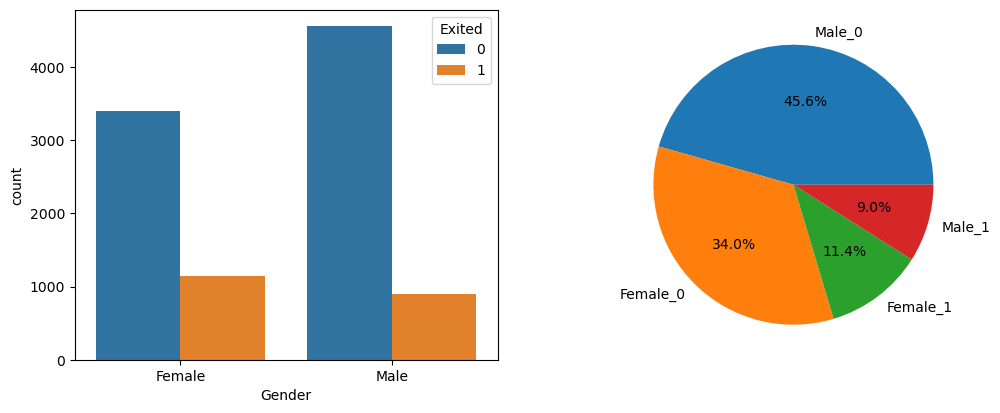

In [19]:
# find the insight and visualation plot wise 

label = ["Male_0","Female_0","Female_1","Male_1"]
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.countplot(data=df, x="Gender",hue="Exited")
plt.subplot(2,2,2)
plt.pie(df.Gender.groupby(df.Exited).value_counts(),
        labels=label,autopct="%0.1f%%")

print(df.Gender.groupby(df.Exited).value_counts())

Obsarvation:
Insight of the Gender column: mostly female customers are exited around 11.4% and male are exited around 9%.

Exited  NumOfProducts
0       2                4242
        1                3675
        3                  46
1       1                1409
        2                 348
        3                 220
        4                  60
Name: count, dtype: int64
------------------------------
Exited  HasCrCard
0       1            5631
        0            2332
1       1            1424
        0             613
Name: count, dtype: int64
------------------------------
Exited  IsActiveMember
0       1.0               4416
        0.0               3547
1       0.0               1302
        1.0                735
Name: count, dtype: int64


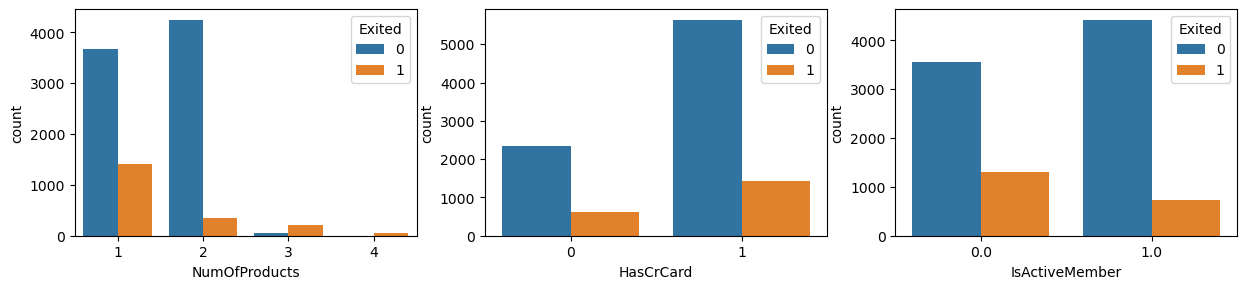

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.countplot(data=df,x="NumOfProducts",hue="Exited")
plt.subplot(3,3,2)
sns.countplot(data=df,x="HasCrCard",hue="Exited")
plt.subplot(3,3,3)
sns.countplot(data=df,x="IsActiveMember",hue="Exited")


print(df.NumOfProducts.groupby(df.Exited).value_counts())
print("--"*15)
print(df.HasCrCard.groupby(df.Exited).value_counts())
print("--"*15)
print(df.IsActiveMember.groupby(df.Exited).value_counts())

Observation:
Insight of the NumOfProducts column: most of the 1 NumOfProducts customers are exited around 1409.
Insight of the HasCrCard column: most of the 1 HasCrCard customers are exited around 1424.
Insight of the IsActiveMember column: mostly 0 number of active member are exited around 1302.

Exited  CreditScore
0       850            190
        678             50
1       850             43
0       684             43
        655             43
                      ... 
1       404              1
        405              1
        407              1
        408              1
0       405              1
Name: count, Length: 862, dtype: int64
------------------------------
Exited  Age
0       37     417
        35     417
        38     414
        34     414
        36     403
              ... 
        88       1
        85       1
        84       1
        83       1
1       84       1
Name: count, Length: 128, dtype: int64


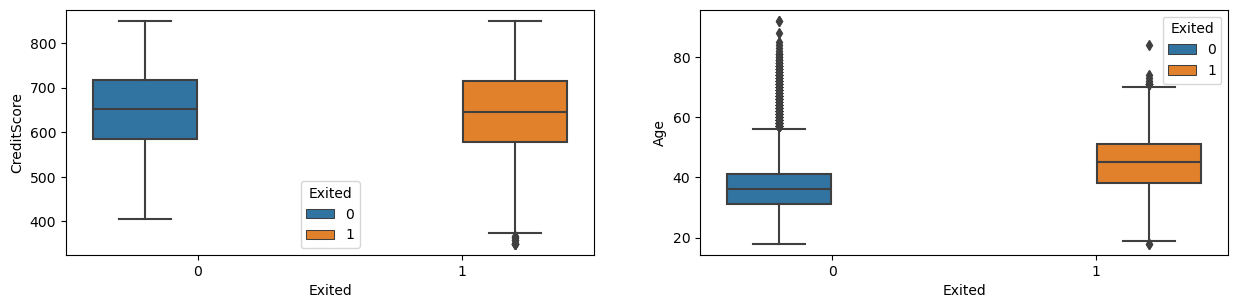

In [21]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.boxplot(y=df["CreditScore"],x=df["Exited"],hue=df["Exited"])
plt.subplot(2,2,2)
sns.boxplot(y=df["Age"],x=df["Exited"],hue=df["Exited"])

print(df[["Exited","CreditScore"]].value_counts())
print("--"*15)
print(df[["Exited","Age"]].value_counts())

Observation:

Insight of the CreditScore column: minimum of the 404 to max 850 CreditScore customers are exited.

Insight of the Age column: mostly minimum age 40 of range and maximum of the age 60 range are customers exited.

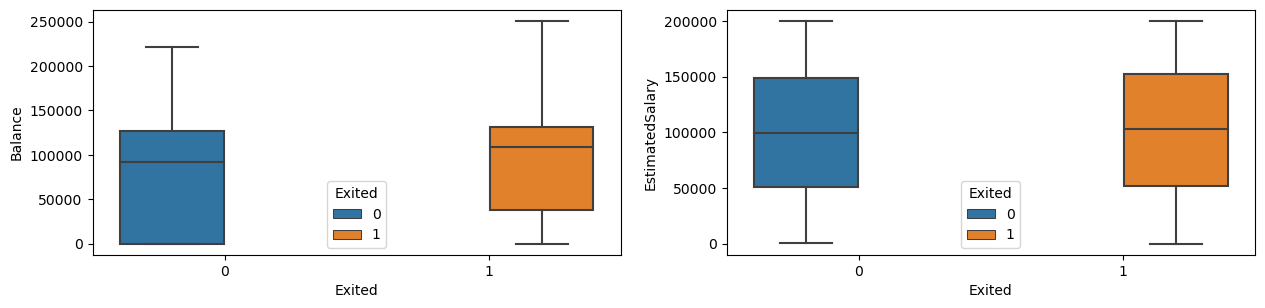

In [22]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.boxplot(y=df["Balance"],x=df["Exited"],hue=df["Exited"])
plt.subplot(2,2,2)
sns.boxplot(y=df["EstimatedSalary"],x=df["Exited"],hue=df["Exited"])
plt.show()

Observation:

Insight of the Balance column: the range of minimum balance 50000 and maximum balance of the 250000 customers are exited.

Insight of the EstimatedSalary column: mostly range of 25% EstimatedSalary 50000 above and maximum EstimatedSalary of the 250000 customers ares exited.

Exited  Tenure
0       7         851
        2         847
        8         828
        1         803
        5         803
        3         796
        4         786
        6         771
        9         771
        10        389
        0         318
1       1         232
        9         213
        3         213
        5         209
        4         203
        2         201
        8         197
        6         196
        7         177
        10        101
        0          95
Name: count, dtype: int64


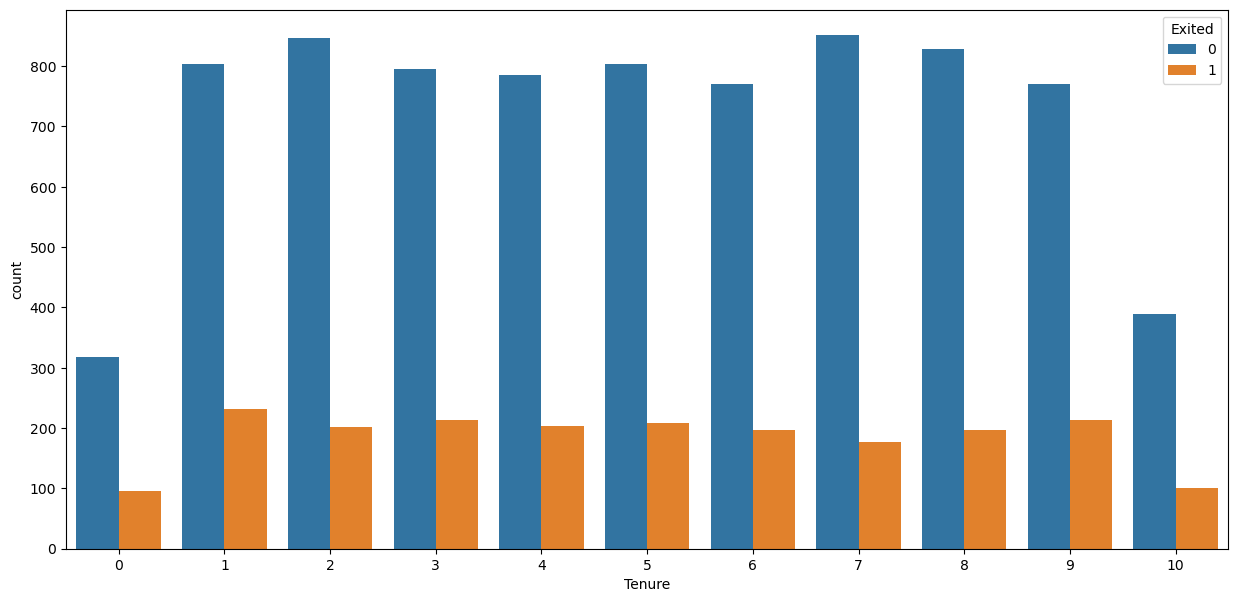

In [23]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x="Tenure",hue="Exited")
print(df.Tenure.groupby(df.Exited).value_counts())

Observation:

insight of the Tenure column: the last 10 customers around 102 customerd are exited and 8,9 year old customer are around 213,197 exited.

Exited customers dataset

In [24]:
exided_df = df[df["Exited"]==1]
exided_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1.0,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0.0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0.0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0.0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0.0,5097.67,1


In [25]:
exided_df.shape

(2037, 11)

In [26]:
# check the max customer balance 
exided_df["Balance"].max()

250898.09

In [27]:
# check the min customer balance 
exided_df["Balance"].min()

0.0

In [28]:
# check the max EstimatedSalary balance 
exided_df["EstimatedSalary"].max()

199808.1

In [29]:
# check the min EstimatedSalary balance 
exided_df["EstimatedSalary"].min()

11.58

Visualizing the correlations between numerical variables¶

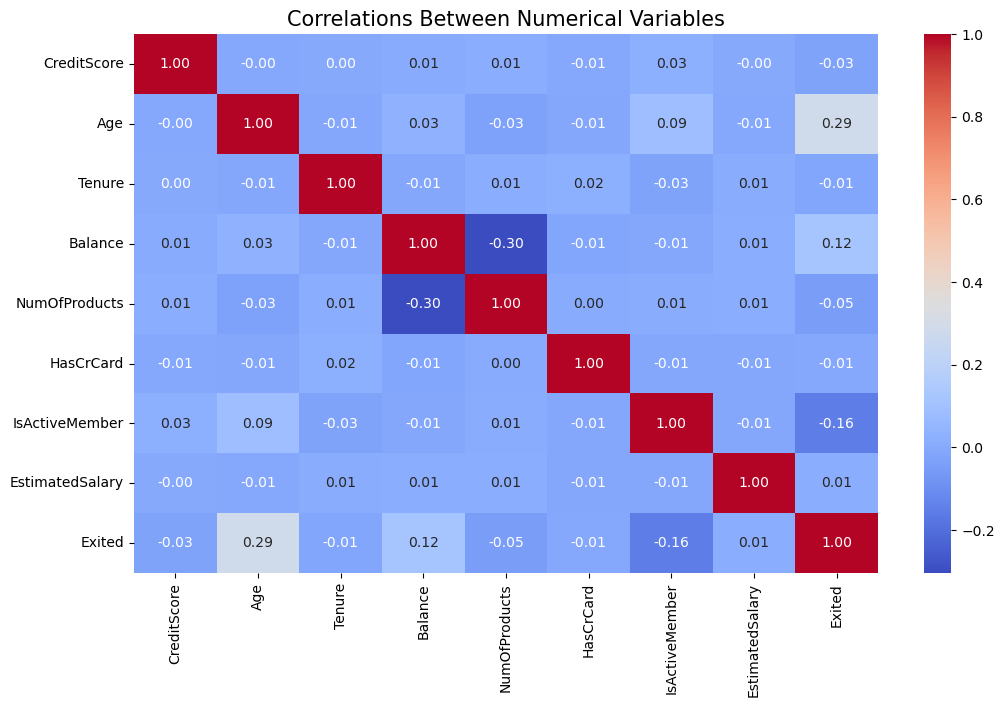

In [30]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlations Between Numerical Variables", size=15)
plt.show()


observation:

Insight, the correlation is. The positive correlation shows is 0.02 to 0.1.


Insight, the correlation is. The negative correlation. It ranges from -0.02.

In [31]:
## creating a new df
df_new = df.copy()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


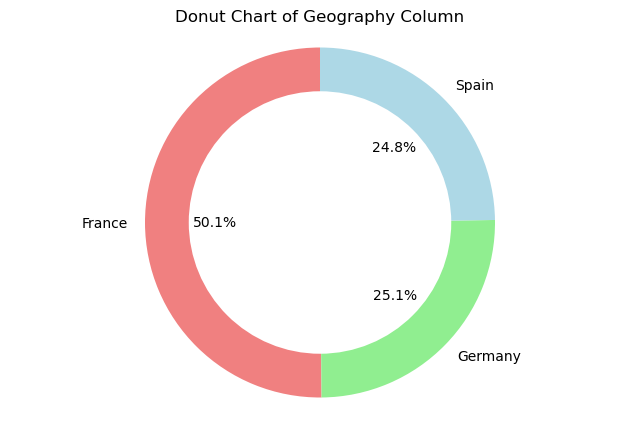

In [32]:
# Count the values in the "Geography" column
geography_counts = df_new["Geography"].value_counts()

plt.figure(figsize=(8, 5))
plt.pie(geography_counts, labels=geography_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen', 'lightblue'])
plt.title("Donut Chart of Geography Column")

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')

print(geography_counts)
plt.show()


Gender
Male      5457
Female    4543
Name: count, dtype: int64


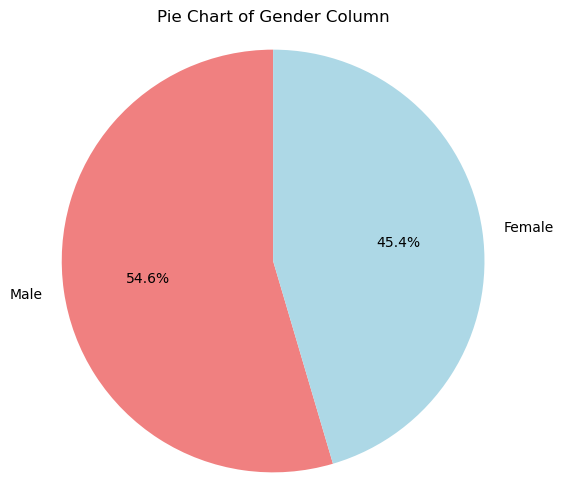

In [33]:
# Count the values in the "Gender" column
gender_counts = df_new["Gender"].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title("Pie Chart of Gender Column")

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

print(gender_counts)
plt.show()


Data preprocessing:

OrdinalEncoder method:

OrdinalEncoder is a preprocessing technique in machine learning that transforms categorical variables into ordinal integers, enabling algorithms to better understand and learn from categorical data

In [34]:
## Data preprocessing for OrdinalEncoder it is used by  convert the categriacal data to numbric data
from sklearn.preprocessing import OrdinalEncoder

a = ["Geography","Gender"] ## select the particalur columns for change the cate to numbric
en_ = OrdinalEncoder()     
df_new[a] = en_.fit_transform(df_new[a])

In [35]:
## encoding after check the columns
print(df_new["Geography"].value_counts())
print(df_new["Gender"].value_counts())

Geography
0.0    5014
1.0    2509
2.0    2477
Name: count, dtype: int64
Gender
1.0    5457
0.0    4543
Name: count, dtype: int64


In [36]:
## encoding after check the columns
df_new.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0.0,0.0,42,2,0.00,1,1,1.0,101348.88,1
1,608,2.0,0.0,41,1,83807.86,1,0,1.0,112542.58,0


In [37]:
# checking the columns
df_new.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

Feature Scaling

Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization or standardization. Feature scaling is generally performed during the data pre-processing stage, before training models using machine learning algorithms.

In [38]:
## select the particalur columns for convert 0 to 1 using feature scaling method by sklearn.
b = ['CreditScore','Age', 'Tenure', 'Balance','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler

mix_scaler = MinMaxScaler()
df_new[b]= mix_scaler.fit_transform(df_new[b])

In [39]:
# after scaling
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,1,1,1.0,0.506735,1
1,0.516,2.0,0.0,0.310811,0.1,0.334031,1,0,1.0,0.562709,0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,3,1,0.0,0.569654,1
3,0.698,0.0,0.0,0.283784,0.1,0.000000,2,0,0.0,0.469120,0
4,1.000,2.0,0.0,0.337838,0.2,0.500246,1,1,1.0,0.395400,0


x,y spliting

In [40]:
x = df_new.iloc[:, :-1]  # Features (all columns except the last one)
y = df_new["Exited"]     # Target variable (the "Exited" column)


train test

In [41]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=43)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(8000, 10)
(8000,)
(2000, 10)
(2000,)


Machine Learning model building

Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report

LR = LogisticRegression()  

# Fit the model to the training data
LR.fit(x_train, y_train)

# Predict on the test data
LR_y_pred = LR.predict(x_test)

print(classification_report(y_test, LR_y_pred))


              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1588
           1       0.59      0.14      0.23       412

    accuracy                           0.80      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.80      0.75      2000



RandomForestClassifier


In [43]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)

# Fit the model to the training data
RF.fit(x_train,y_train)

# Predict on the test data
RF_y_pred = RF.predict(x_test)


print(classification_report(y_test,RF_y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1588
           1       1.00      0.07      0.12       412

    accuracy                           0.81      2000
   macro avg       0.90      0.53      0.51      2000
weighted avg       0.85      0.81      0.73      2000



In [44]:
print(x.shape)
print(y.shape)


(10000, 10)
(10000,)


In [46]:
# Value counts for the target variable (y)
target_value_counts = y.value_counts()
print("Value counts for y:")
print(target_value_counts)


Value counts for y:
Exited
0    7963
1    2037
Name: count, dtype: int64


Using SMOTE to balance the dataset

In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x, y = smote.fit_resample(x, y)

y.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=43)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12740, 10)
(12740,)
(3186, 10)
(3186,)


In [49]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)

RF.fit(x_train,y_train)

RF_y_pred = RF.predict(x_test)


print(classification_report(y_test,RF_y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1597
           1       0.76      0.78      0.77      1589

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.77      0.77      0.77      3186



In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


LR = LogisticRegression() 

LR.fit(x_train, y_train)

LR_y_pred = LR.predict(x_test)


print(classification_report(y_test, LR_y_pred))


              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1597
           1       0.71      0.71      0.71      1589

    accuracy                           0.71      3186
   macro avg       0.71      0.71      0.71      3186
weighted avg       0.71      0.71      0.71      3186

